"TANTEO" de los datos de la base de CIFAR 100

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import pickle

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dl-itba-cifar-100-2024-q-1/y_train_fine.npy
/kaggle/input/dl-itba-cifar-100-2024-q-1/y_train_coarse.npy
/kaggle/input/dl-itba-cifar-100-2024-q-1/fine_label_names.pck
/kaggle/input/dl-itba-cifar-100-2024-q-1/coarse_label_names.pck
/kaggle/input/dl-itba-cifar-100-2024-q-1/x_test.npy
/kaggle/input/dl-itba-cifar-100-2024-q-1/x_train.npy


In [10]:
INPUT_DIR = '/kaggle/input/dl-itba-cifar-100-2024-q-1/'
x_train = np.load(INPUT_DIR+'x_train.npy')/255.
y_train_coarse = np.load(INPUT_DIR+'y_train_coarse.npy')/255.
y_train_fine = np.load(INPUT_DIR+'y_train_fine.npy')
x_test = np.load(INPUT_DIR+'x_test.npy')

In [11]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
y_train_coarse.shape

In [5]:
y_train_fine.shape

(50000,)

In [ ]:
x_test.shape

Analizo una imagen cualquiera

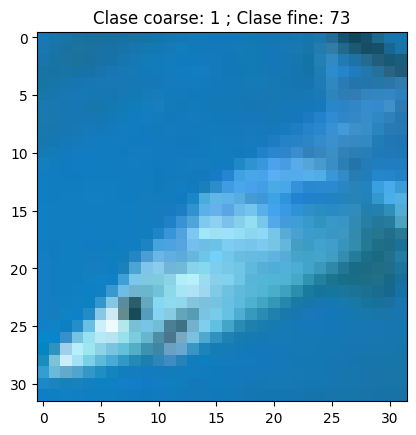

In [3]:
# Pick an image from train dataset
index = 50

# Show the image
plt.imshow(x_train[index])
plt.title(f'Clase coarse: {y_train_coarse[index]} ; Clase fine: {y_train_fine[index]}')
plt.show()

Muestro todas las clases de grano grueso y listo para cada una sus respectivas clases de grano fino que le corresponden

In [8]:
clases_coarse = set(y_train_coarse)
fin = open(INPUT_DIR+'coarse_label_names.pck', 'rb')
coarse_labels = pickle.load(fin)
clases_fine = set(y_train_fine)
fin = open(INPUT_DIR+'fine_label_names.pck', 'rb')
fine_labels = pickle.load(fin)

dcoarse = {k:coarse_labels[k] for k in clases_coarse}
d = {k:{} for k in clases_coarse}
for i in range(len(y_train_fine)):
    d[y_train_coarse[i]][y_train_fine[i]] = fine_labels[y_train_fine[i]]
d

{0: {55: 'otter', 72: 'seal', 95: 'whale', 4: 'beaver', 30: 'dolphin'},
 1: {1: 'aquarium_fish', 73: 'shark', 32: 'flatfish', 67: 'ray', 91: 'trout'},
 2: {82: 'sunflower', 70: 'rose', 92: 'tulip', 62: 'poppy', 54: 'orchid'},
 3: {28: 'cup', 9: 'bottle', 61: 'plate', 10: 'bowl', 16: 'can'},
 4: {0: 'apple', 51: 'mushroom', 83: 'sweet_pepper', 53: 'orange', 57: 'pear'},
 5: {86: 'telephone',
  39: 'keyboard',
  87: 'television',
  22: 'clock',
  40: 'lamp'},
 6: {84: 'table', 20: 'chair', 94: 'wardrobe', 25: 'couch', 5: 'bed'},
 7: {24: 'cockroach',
  14: 'butterfly',
  6: 'bee',
  18: 'caterpillar',
  7: 'beetle'},
 8: {97: 'wolf', 42: 'leopard', 43: 'lion', 88: 'tiger', 3: 'bear'},
 9: {17: 'castle', 76: 'skyscraper', 68: 'road', 12: 'bridge', 37: 'house'},
 10: {23: 'cloud', 71: 'sea', 49: 'mountain', 33: 'forest', 60: 'plain'},
 11: {19: 'cattle',
  31: 'elephant',
  21: 'chimpanzee',
  15: 'camel',
  38: 'kangaroo'},
 12: {64: 'possum', 75: 'skunk', 66: 'raccoon', 34: 'fox', 63: 'p

Muestro en un histograma las frecuencias para todas las clases. Claramente están perfectamente balanceadas por lo tanto la precisión es una métrica apropiada para evaluar el modelo que se hará.

In [ ]:
plt.hist(y_train_coarse, bins=len(clases_coarse))
plt.ylabel('Frecuencia absoluta')
plt.xlabel('Clases coarse')
plt.show()

plt.hist(y_train_fine, bins=len(clases_fine))
plt.ylabel('Frecuencia absoluta')
plt.xlabel('Clases fine')
plt.show()